#### **해밀턴 경로 및 회로를 이용한 배송도로망 최적화 실험**

In [ ]:
pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 2.2 MB/s eta 0:00:00


In [ ]:
pip install networkx

**해밑턴 경로**

In [ ]:
import osmnx as ox
import networkx as nx
import folium

# 대전 서구 내동 지역 좌표 범위
north = 36.3378
south = 36.3347
east = 127.4313
west = 127.4284

# 경유지 좌표 리스트
waypoints = [(36.3365, 127.4288),
             (36.3355, 127.4315),
             (36.3349, 127.4292),
             (36.3357, 127.4284),
             (36.3363, 127.4310)]


# 경유지 노드 찾기
G = ox.graph_from_bbox(north, south, east, west, network_type='all', retain_all=True)
# OpenStreetMap에서 경로 그래프를 가져옵니다.

# 연결 요소 확인
components = list(nx.strongly_connected_components(G))
# 그래프의 연결 요소들을 찾습니다.

# 연결 요소 중 하나를 선택하여 강연결 그래프로 변환
largest_component = max(components, key=len)
# 가장 큰 연결 요소를 선택합니다.
G = G.subgraph(largest_component).copy()
# 선택한 연결 요소를 강연결 그래프로 변환합니다.
waypoint_nodes = []
for waypoint in waypoints:
    node = ox.distance.nearest_nodes(G, waypoint[1], waypoint[0])
    # 주어진 좌표에 가장 가까운 노드를 찾습니다.
    waypoint_nodes.append(node)
    # 찾은 노드를 경유지 노드 리스트에 추가합니다.

# 해밀턴 경로 계산
hamiltonian_path = list(nx.approximation.traveling_salesman_problem(G, nodes=waypoint_nodes))
# 주어진 경유지들을 포함한 해밀턴 경로를 계산합니다.

# 출력용 좌표 리스트
circuit_coordinates = []

# 지도 생성
m = folium.Map(location=waypoints[0], zoom_start=16)
# Folium을 사용하여 지도를 생성합니다. 지도의 초기 위치는 첫 번째 경유지로 설정하고 확대 수준은 16으로 설정합니다.

# 도로망 시각화
for u, v, k, data in G.edges(keys=True, data=True):
    if 'geometry' in data:
        geometry = data['geometry']
        if isinstance(geometry, list):
            for edge in geometry:
                folium.PolyLine(locations=edge, color='gray', weight=2).add_to(m)
        else:
            folium.PolyLine(locations=geometry, color='gray', weight=2).add_to(m)
# 도로망을 시각화합니다. 각 도로는 회색으로 표시됩니다.

# 해밀턴 경로 시각화
for i in range(len(hamiltonian_path) - 1):
    u = hamiltonian_path[i]
    v = hamiltonian_path[i + 1]
    route = nx.shortest_path(G, u, v, weight='length')
    # 해밀턴 경로 상의 두 경유지 사이의 최단 경로

    route_coordinates = []
    for node in route:
        x, y = G.nodes[node]['x'], G.nodes[node]['y']
        route_coordinates.append((y, x))
        circuit_coordinates.append((y, x))
    folium.PolyLine(locations=route_coordinates, color='red', weight=2).add_to(m)
# 해밀턴 경로 상의 각 경유지 사이의 최단 경로를 시각화합니다. 각 경로는 빨간색으로 표시됩니다.

# 경유지 마커 시각화
for i, waypoint in enumerate(waypoints):
    folium.Marker(location=waypoint, icon=folium.DivIcon(
        html=f'<div style="font-size: 12px; color: white; background-color: red; border-radius: 50%; width: 18px; height: 18px; display: flex; justify-content: center; align-items: center;">{i+1}</div>'
    )).add_to(m)
# 각 경유지에 마커를 추가하여 시각화합니다. 마커에는 숫자와 배경색이 있는 원형 아이콘이 사용됩니다.

# 지도 출력
m

In [ ]:
import osmnx as ox
import networkx as nx
import folium

# 대전 서구 내동 지역 좌표 범위
north = 36.3378
south = 36.3347
east = 127.4313
west = 127.4284

# 경유지 좌표 리스트
waypoints = [(36.3365, 127.4288),
             (36.3355, 127.4315),
             (36.3349, 127.4292),
             (36.3357, 127.4284),
             (36.3363, 127.4310)]


# 경유지 노드 찾기
G = ox.graph_from_bbox(north, south, east, west, network_type='all', retain_all=True)
# OpenStreetMap에서 경로 그래프를 가져옵니다.

# 연결 요소 확인
components = list(nx.strongly_connected_components(G))
# 그래프의 연결 요소들을 찾습니다.

# 연결 요소 중 하나를 선택하여 강연결 그래프로 변환
largest_component = max(components, key=len)
# 가장 큰 연결 요소를 선택합니다.
G = G.subgraph(largest_component).copy()
# 선택한 연결 요소를 강연결 그래프로 변환합니다.
waypoint_nodes = []
for waypoint in waypoints:
    node = ox.distance.nearest_nodes(G, waypoint[1], waypoint[0])
    # 주어진 좌표에 가장 가까운 노드를 찾습니다.
    waypoint_nodes.append(node)
    # 찾은 노드를 경유지 노드 리스트에 추가합니다.

# 해밀턴 경로 계산
hamiltonian_path = list(nx.approximation.traveling_salesman_problem(G, nodes=waypoint_nodes))
# 주어진 경유지들을 포함한 해밀턴 경로를 계산합니다.

# 출력용 좌표 리스트
circuit_coordinates = []

# 지도 생성
m = folium.Map(location=waypoints[0], zoom_start=16)
# Folium을 사용하여 지도를 생성합니다. 지도의 초기 위치는 첫 번째 경유지로 설정하고 확대 수준은 16으로 설정합니다.

# 도로망 시각화
for u, v, k, data in G.edges(keys=True, data=True):
    if 'geometry' in data:
        geometry = data['geometry']
        if isinstance(geometry, list):
            for edge in geometry:
                folium.PolyLine(locations=edge, color='gray', weight=2).add_to(m)
        else:
            folium.PolyLine(locations=geometry, color='gray', weight=2).add_to(m)
# 도로망을 시각화합니다. 각 도로는 회색으로 표시됩니다.

# 해밀턴 경로 시각화
for i in range(len(hamiltonian_path) - 1):
    u = hamiltonian_path[i]
    v = hamiltonian_path[i + 1]
    route = nx.shortest_path(G, u, v, weight='length')
    # 해밀턴 경로 상의 두 경유지 사이의 최단 경로

    route_coordinates = []
    for node in route:
        x, y = G.nodes[node]['x'], G.nodes[node]['y']
        route_coordinates.append((y, x))
        circuit_coordinates.append((y, x))
    folium.PolyLine(locations=route_coordinates, color='red', weight=2).add_to(m)
# 해밀턴 경로 상의 각 경유지 사이의 최단 경로를 시각화합니다. 각 경로는 빨간색으로 표시됩니다.

# 경유지 마커 시각화
for i, waypoint in enumerate(waypoints):
    folium.Marker(location=waypoint, icon=folium.DivIcon(
        html=f'<div style="font-size: 12px; color: white; background-color: red; border-radius: 50%; width: 18px; height: 18px; display: flex; justify-content: center; align-items: center;">{i+1}</div>'
    )).add_to(m)
# 각 경유지에 마커를 추가하여 시각화합니다. 마커에는 숫자와 배경색이 있는 원형 아이콘이 사용됩니다.

# 지도 출력
m

# 출력용 좌표 순서 출력
print("해밀턴 경로 :")
for i, coord in enumerate(circuit_coordinates):
    print(f"{i+1}: {coord}")

해밀턴 경로 :
1: (36.335878, 127.4308807)
2: (36.3358038, 127.4307094)
3: (36.3358038, 127.4307094)
4: (36.3357551, 127.4306215)
5: (36.3357551, 127.4306215)
6: (36.3351871, 127.4297184)
7: (36.3351871, 127.4297184)
8: (36.3355139, 127.429457)
9: (36.3355139, 127.429457)
10: (36.3349841, 127.4285938)
11: (36.3349841, 127.4285938)
12: (36.3355139, 127.429457)
13: (36.3355139, 127.429457)
14: (36.3358033, 127.4292446)
15: (36.3358033, 127.4292446)
16: (36.3361107, 127.4290097)
17: (36.3361107, 127.4290097)
18: (36.3363816, 127.4288137)
19: (36.3363816, 127.4288137)
20: (36.3361107, 127.4290097)
21: (36.3361107, 127.4290097)
22: (36.3358033, 127.4292446)
23: (36.3358033, 127.4292446)
24: (36.3355139, 127.429457)
25: (36.3355139, 127.429457)
26: (36.3351871, 127.4297184)
27: (36.3351871, 127.4297184)
28: (36.3357551, 127.4306215)
29: (36.3357551, 127.4306215)
30: (36.3358038, 127.4307094)
31: (36.3358038, 127.4307094)
32: (36.335878, 127.4308807)


**해밀턴 회로**

In [ ]:
import osmnx as ox
import networkx as nx
import folium

# 대전 서구 내동 지역 좌표 범위
north = 36.338
south = 36.334
east = 127.432
west = 127.428

# 경유지 좌표 리스트
waypoints = [(36.3365, 127.429),
             (36.3355, 127.4315),
             (36.3349, 127.4292),
             (36.3357, 127.4284),
             (36.3363, 127.431),]

# 경유지 노드 찾기
G = ox.graph_from_bbox(north, south, east, west, network_type='all', retain_all=True)
# 연결 요소 확인
components = list(nx.strongly_connected_components(G))

# 연결 요소 중 하나를 선택하여 강연결 그래프로 변환
largest_component = max(components, key=len)
G = G.subgraph(largest_component).copy()
waypoint_nodes = []
for waypoint in waypoints:
    node = ox.distance.nearest_nodes(G, waypoint[1], waypoint[0])
    waypoint_nodes.append(node)

# 해밀턴 회로 계산
hamiltonian_circuit = list(nx.approximation.traveling_salesman_problem(G, cycle=True, nodes=waypoint_nodes))

# 출력용 좌표 리스트
circuit_coordinates = []

# 지도 생성
m = folium.Map(location=waypoints[0], zoom_start=16)

# 도로망 시각화
for u, v, k, data in G.edges(keys=True, data=True):
    if 'geometry' in data:
        geometry = data['geometry']
        if isinstance(geometry, list):
            for edge in geometry:
                folium.PolyLine(locations=edge, color='gray', weight=2).add_to(m)
        else:
            edge_coordinates = list(geometry.coords)
            folium.PolyLine(locations=edge_coordinates, color='gray', weight=2).add_to(m)

# 해밀턴 회로 시각화
for i in range(len(hamiltonian_circuit) - 1):
    u = hamiltonian_circuit[i]
    v = hamiltonian_circuit[i + 1]
    route = nx.shortest_path(G, u, v, weight='length')
    route_coordinates = []
    for node in route:
        x, y = G.nodes[node]['x'], G.nodes[node]['y']
        route_coordinates.append((y, x))
        circuit_coordinates.append((y, x))
    folium.PolyLine(locations=route_coordinates, color='red', weight=2).add_to(m)

# 경유지 마커 시각화
for i, waypoint in enumerate(waypoints):
    folium.Marker(location=waypoint, icon=folium.DivIcon(
        html=f'<div style="font-size: 12px; color: white; background-color: red; border-radius: 50%; width: 18px; height: 18px; display: flex; justify-content: center; align-items: center;">{i+1}</div>'
    )).add_to(m)

# 출력용 좌표 순서 출력
print("Hamiltonian Circuit Coordinates:")
for i, coord in enumerate(circuit_coordinates):
    print(f"{i+1}: {coord}")

# 지도 출력
m


Hamiltonian Circuit Coordinates:
1: (36.335878, 127.4308807)
2: (36.3358038, 127.4307094)
3: (36.3358038, 127.4307094)
4: (36.3357551, 127.4306215)
5: (36.3357551, 127.4306215)
6: (36.3351871, 127.4297184)
7: (36.3351871, 127.4297184)
8: (36.3346872, 127.4288497)
9: (36.3346872, 127.4288497)
10: (36.3351871, 127.4297184)
11: (36.3351871, 127.4297184)
12: (36.3355139, 127.429457)
13: (36.3355139, 127.429457)
14: (36.3358033, 127.4292446)
15: (36.3358033, 127.4292446)
16: (36.3361107, 127.4290097)
17: (36.3361107, 127.4290097)
18: (36.3363816, 127.4288137)
19: (36.3363816, 127.4288137)
20: (36.3361107, 127.4290097)
21: (36.3361107, 127.4290097)
22: (36.3357242, 127.4282532)
23: (36.3357242, 127.4282532)
24: (36.3361107, 127.4290097)
25: (36.3361107, 127.4290097)
26: (36.3358033, 127.4292446)
27: (36.3358033, 127.4292446)
28: (36.3355139, 127.429457)
29: (36.3355139, 127.429457)
30: (36.3351871, 127.4297184)
31: (36.3351871, 127.4297184)
32: (36.3357551, 127.4306215)
33: (36.3357551, 127.

In [ ]:
import osmnx as ox
import networkx as nx
import folium

# 대전 서구 내동 지역 좌표 범위
north = 36.338
south = 36.334
east = 127.432
west = 127.428

# 경유지 좌표 리스트
waypoints = [(36.3365, 127.429),
             (36.3355, 127.4315),
             (36.3349, 127.4292),
             (36.3357, 127.4284),
             (36.3363, 127.431),]

# 경유지 노드 찾기
G = ox.graph_from_bbox(north, south, east, west, network_type='all', retain_all=True)
# 연결 요소 확인
components = list(nx.strongly_connected_components(G))

# 연결 요소 중 하나를 선택하여 강연결 그래프로 변환
largest_component = max(components, key=len)
G = G.subgraph(largest_component).copy()
waypoint_nodes = []
for waypoint in waypoints:
    node = ox.distance.nearest_nodes(G, waypoint[1], waypoint[0])
    waypoint_nodes.append(node)

# 해밀턴 회로 계산
hamiltonian_circuit = list(nx.approximation.traveling_salesman_problem(G, cycle=True, nodes=waypoint_nodes))

# 출력용 좌표 리스트
circuit_coordinates = []

# 지도 생성
m = folium.Map(location=waypoints[0], zoom_start=16)

# 도로망 시각화
for u, v, k, data in G.edges(keys=True, data=True):
    if 'geometry' in data:
        geometry = data['geometry']
        if isinstance(geometry, list):
            for edge in geometry:
                folium.PolyLine(locations=edge, color='gray', weight=2).add_to(m)
        else:
            edge_coordinates = list(geometry.coords)
            folium.PolyLine(locations=edge_coordinates, color='gray', weight=2).add_to(m)

# 해밀턴 회로 시각화
for i in range(len(hamiltonian_circuit) - 1):
    u = hamiltonian_circuit[i]
    v = hamiltonian_circuit[i + 1]
    route = nx.shortest_path(G, u, v, weight='length')
    route_coordinates = []
    for node in route:
        x, y = G.nodes[node]['x'], G.nodes[node]['y']
        route_coordinates.append((y, x))
        circuit_coordinates.append((y, x))
    folium.PolyLine(locations=route_coordinates, color='red', weight=2).add_to(m)

# 경유지 마커 시각화
for i, waypoint in enumerate(waypoints):
    folium.Marker(location=waypoint, icon=folium.DivIcon(
        html=f'<div style="font-size: 12px; color: white; background-color: red; border-radius: 50%; width: 18px; height: 18px; display: flex; justify-content: center; align-items: center;">{i+1}</div>'
    )).add_to(m)

# 지도 출력
m

# 출력용 좌표 순서 출력
print("해밀턴 회로 :")
for i, coord in enumerate(circuit_coordinates):
    print(f"{i+1}: {coord}")



해밀턴 회로 :
1: (36.335878, 127.4308807)
2: (36.3358038, 127.4307094)
3: (36.3358038, 127.4307094)
4: (36.3357551, 127.4306215)
5: (36.3357551, 127.4306215)
6: (36.3351871, 127.4297184)
7: (36.3351871, 127.4297184)
8: (36.3346872, 127.4288497)
9: (36.3346872, 127.4288497)
10: (36.3351871, 127.4297184)
11: (36.3351871, 127.4297184)
12: (36.3355139, 127.429457)
13: (36.3355139, 127.429457)
14: (36.3358033, 127.4292446)
15: (36.3358033, 127.4292446)
16: (36.3361107, 127.4290097)
17: (36.3361107, 127.4290097)
18: (36.3357242, 127.4282532)
19: (36.3357242, 127.4282532)
20: (36.3361107, 127.4290097)
21: (36.3361107, 127.4290097)
22: (36.3363816, 127.4288137)
23: (36.3363816, 127.4288137)
24: (36.3361107, 127.4290097)
25: (36.3361107, 127.4290097)
26: (36.3358033, 127.4292446)
27: (36.3358033, 127.4292446)
28: (36.3355139, 127.429457)
29: (36.3355139, 127.429457)
30: (36.3351871, 127.4297184)
31: (36.3351871, 127.4297184)
32: (36.3357551, 127.4306215)
33: (36.3357551, 127.4306215)
34: (36.3358038

hamiltonian_path = list(nx.approximation.traveling_salesman_problem(G, nodes=waypoint_nodes))
=> 해밀턴 경로 구하는 경우
hamiltonian_circuit = list(nx.approximation.traveling_salesman_problem(G, cycle=True, nodes=waypoint_nodes))
=> 해밀턴 회로 구하는 경우

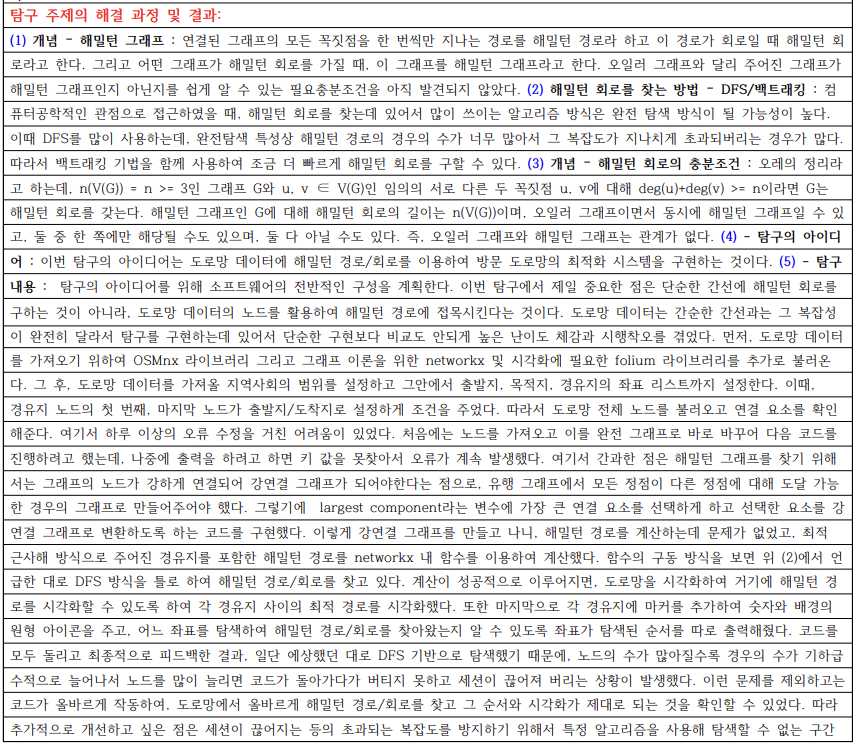

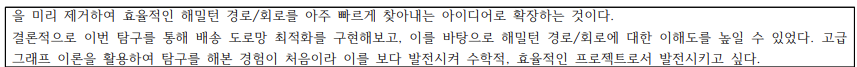

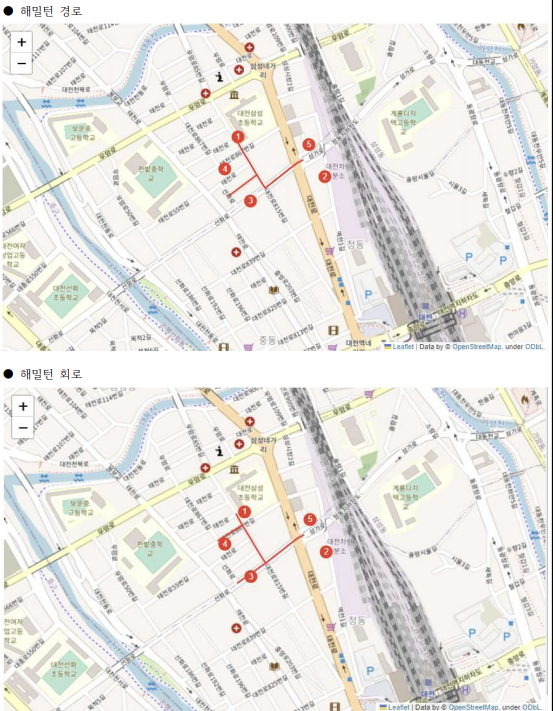